In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [32]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
submission=pd.read_csv("sample_submission.csv")

In [3]:
test.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,...,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,...,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,...,1,0,0,0,0,0,0,0,0,0


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id          50000 non-null  int64
 1   feature_0   50000 non-null  int64
 2   feature_1   50000 non-null  int64
 3   feature_2   50000 non-null  int64
 4   feature_3   50000 non-null  int64
 5   feature_4   50000 non-null  int64
 6   feature_5   50000 non-null  int64
 7   feature_6   50000 non-null  int64
 8   feature_7   50000 non-null  int64
 9   feature_8   50000 non-null  int64
 10  feature_9   50000 non-null  int64
 11  feature_10  50000 non-null  int64
 12  feature_11  50000 non-null  int64
 13  feature_12  50000 non-null  int64
 14  feature_13  50000 non-null  int64
 15  feature_14  50000 non-null  int64
 16  feature_15  50000 non-null  int64
 17  feature_16  50000 non-null  int64
 18  feature_17  50000 non-null  int64
 19  feature_18  50000 non-null  int64
 20  feature_19  50000 non-null  

In [5]:
test.shape

(50000, 51)

In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50000.0,124999.50000,14433.901067,100000.0,112499.75,124999.5,137499.25,149999.0
feature_0,50000.0,0.25462,0.910607,0.0,0.00,0.0,0.00,10.0
feature_1,50000.0,0.44348,2.004536,0.0,0.00,0.0,0.00,31.0
feature_2,50000.0,0.11672,0.524807,0.0,0.00,0.0,0.00,6.0
feature_3,50000.0,0.58444,1.814083,0.0,0.00,0.0,0.00,25.0
feature_4,50000.0,0.61264,2.819580,0.0,0.00,0.0,0.00,38.0
feature_5,50000.0,0.16150,0.605760,0.0,0.00,0.0,0.00,9.0
feature_6,50000.0,0.74600,2.352495,0.0,0.00,0.0,0.00,25.0
feature_7,50000.0,1.23804,2.728055,0.0,0.00,0.0,1.00,29.0
feature_8,50000.0,0.88644,3.364154,0.0,0.00,0.0,0.00,35.0


In [7]:
train.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 52 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          100000 non-null  int64 
 1   feature_0   100000 non-null  int64 
 2   feature_1   100000 non-null  int64 
 3   feature_2   100000 non-null  int64 
 4   feature_3   100000 non-null  int64 
 5   feature_4   100000 non-null  int64 
 6   feature_5   100000 non-null  int64 
 7   feature_6   100000 non-null  int64 
 8   feature_7   100000 non-null  int64 
 9   feature_8   100000 non-null  int64 
 10  feature_9   100000 non-null  int64 
 11  feature_10  100000 non-null  int64 
 12  feature_11  100000 non-null  int64 
 13  feature_12  100000 non-null  int64 
 14  feature_13  100000 non-null  int64 
 15  feature_14  100000 non-null  int64 
 16  feature_15  100000 non-null  int64 
 17  feature_16  100000 non-null  int64 
 18  feature_17  100000 non-null  int64 
 19  feature_18  100000 non-n

In [9]:
train.shape

(100000, 52)

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,49999.50000,28867.657797,0.0,24999.75,49999.5,74999.25,99999.0
feature_0,100000.0,0.25783,0.929033,0.0,0.00,0.0,0.00,10.0
feature_1,100000.0,0.43172,1.977862,0.0,0.00,0.0,0.00,31.0
feature_2,100000.0,0.11413,0.519584,0.0,0.00,0.0,0.00,6.0
feature_3,100000.0,0.59055,1.844558,0.0,0.00,0.0,0.00,26.0
feature_4,100000.0,0.59977,2.785531,0.0,0.00,0.0,0.00,38.0
feature_5,100000.0,0.16082,0.601149,0.0,0.00,0.0,0.00,10.0
feature_6,100000.0,0.73149,2.343465,0.0,0.00,0.0,0.00,27.0
feature_7,100000.0,1.22892,2.692732,0.0,0.00,0.0,1.00,31.0
feature_8,100000.0,0.90335,3.415258,0.0,0.00,0.0,0.00,39.0


# Target

In [11]:
feature_col=train.columns
feature_col

Index(['id', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34',
       'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39',
       'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44',
       'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49',
       'target'],
      dtype='object')

In [12]:
target_col=train['target'].value_counts().sort_index(ascending=True)
target_col

Class_1     8490
Class_2    57497
Class_3    21420
Class_4    12593
Name: target, dtype: int64

Text(0, 0.5, 'count')

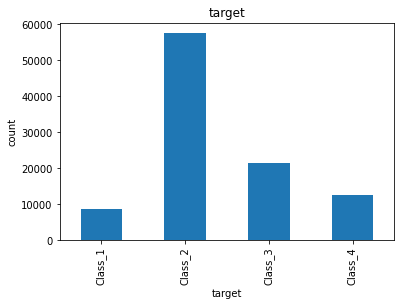

In [13]:
target_col.plot.bar()
plt.title('target')
plt.xlabel('target')
plt.ylabel('count')

Class_2가 가장 많음, 2,4,1 순으로 많음

# id 없애기

In [44]:
train=train.drop(['id'],axis=1)
test=test.drop(['id'],axis=1)

<ipython-input-45-b2233f3f3f13>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(corr,dtype=np.bool))


<AxesSubplot:>

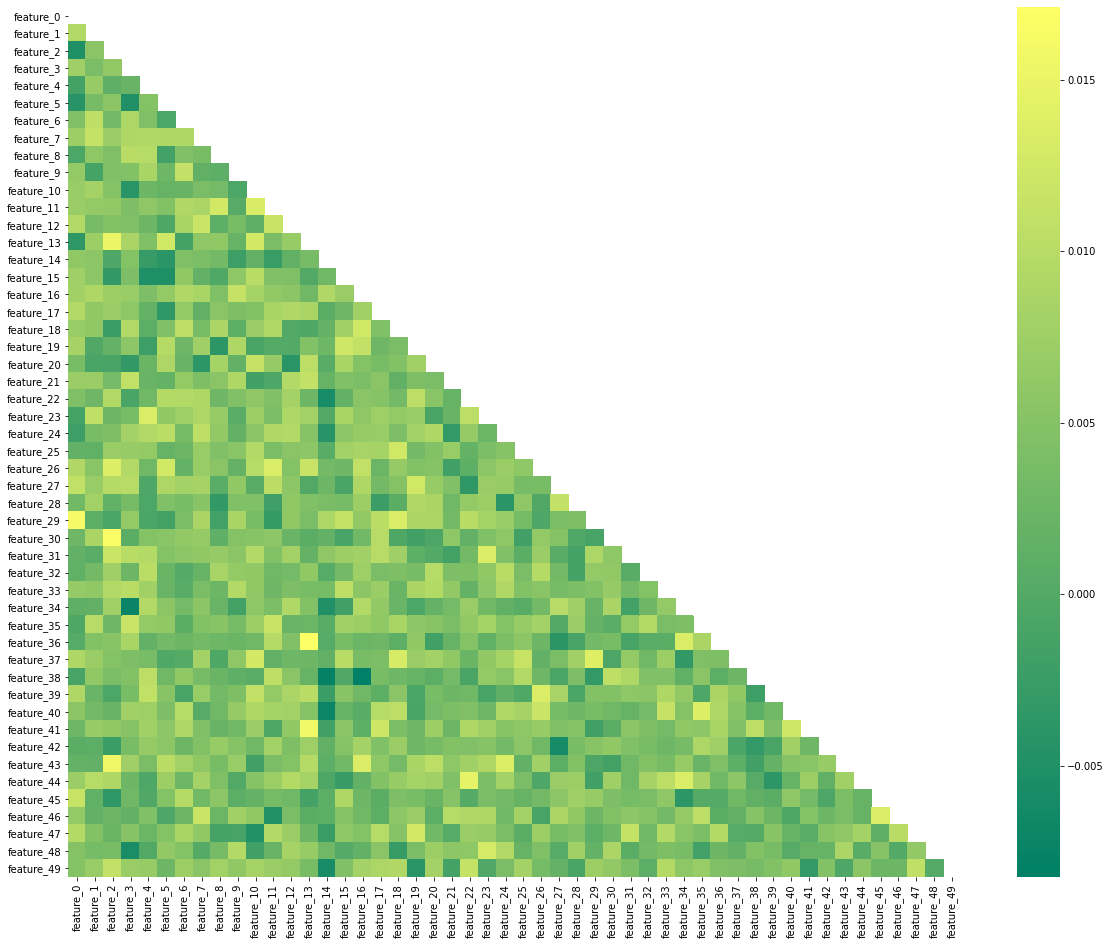

In [45]:
fig,ax=plt.subplots(figsize=(20,16))
corr=train.corr()
mask=np.triu(np.ones_like(corr,dtype=np.bool))
sns.heatmap(corr,mask=mask,cmap='summer',fmt='.2f')

In [46]:
train['target1'] = train['target'].map({'Class_1':0, 'Class_2':1, 'Class_3':2, 'Class_4':3})
train.corr()['target1'].sort_values(ascending=False)

target1       1.000000
feature_34    0.011190
feature_36    0.011022
feature_13    0.008777
feature_2     0.008683
feature_43    0.006988
feature_44    0.005296
feature_26    0.003861
feature_39    0.003725
feature_47    0.001420
feature_27   -0.000803
feature_30   -0.001788
feature_33   -0.002762
feature_8    -0.002972
feature_1    -0.004268
feature_12   -0.005238
feature_42   -0.005259
feature_4    -0.005299
feature_3    -0.005365
feature_11   -0.005454
feature_38   -0.005555
feature_48   -0.005604
feature_22   -0.006046
feature_49   -0.006142
feature_21   -0.007207
feature_5    -0.007607
feature_40   -0.009897
feature_23   -0.011194
feature_17   -0.011203
feature_7    -0.011429
feature_41   -0.011582
feature_32   -0.012779
feature_35   -0.014076
feature_18   -0.014802
feature_46   -0.014952
feature_45   -0.015293
feature_19   -0.015738
feature_24   -0.015972
feature_10   -0.016502
feature_9    -0.017665
feature_16   -0.017736
feature_31   -0.017970
feature_20   -0.018615
feature_28 

In [47]:
X=train.iloc[:,:-2]
y=train['target']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)



## XGBoost

In [100]:
from xgboost import XGBClassifier,plot_importance

model=XGBClassifier(random_state=1,use_label_encoder=True,n_estimators=128,max_depth=3)
model.fit(X_train,y_train,eval_metric="logloss",verbose=True)


C:\ProgramData\Miniconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=128, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=1, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

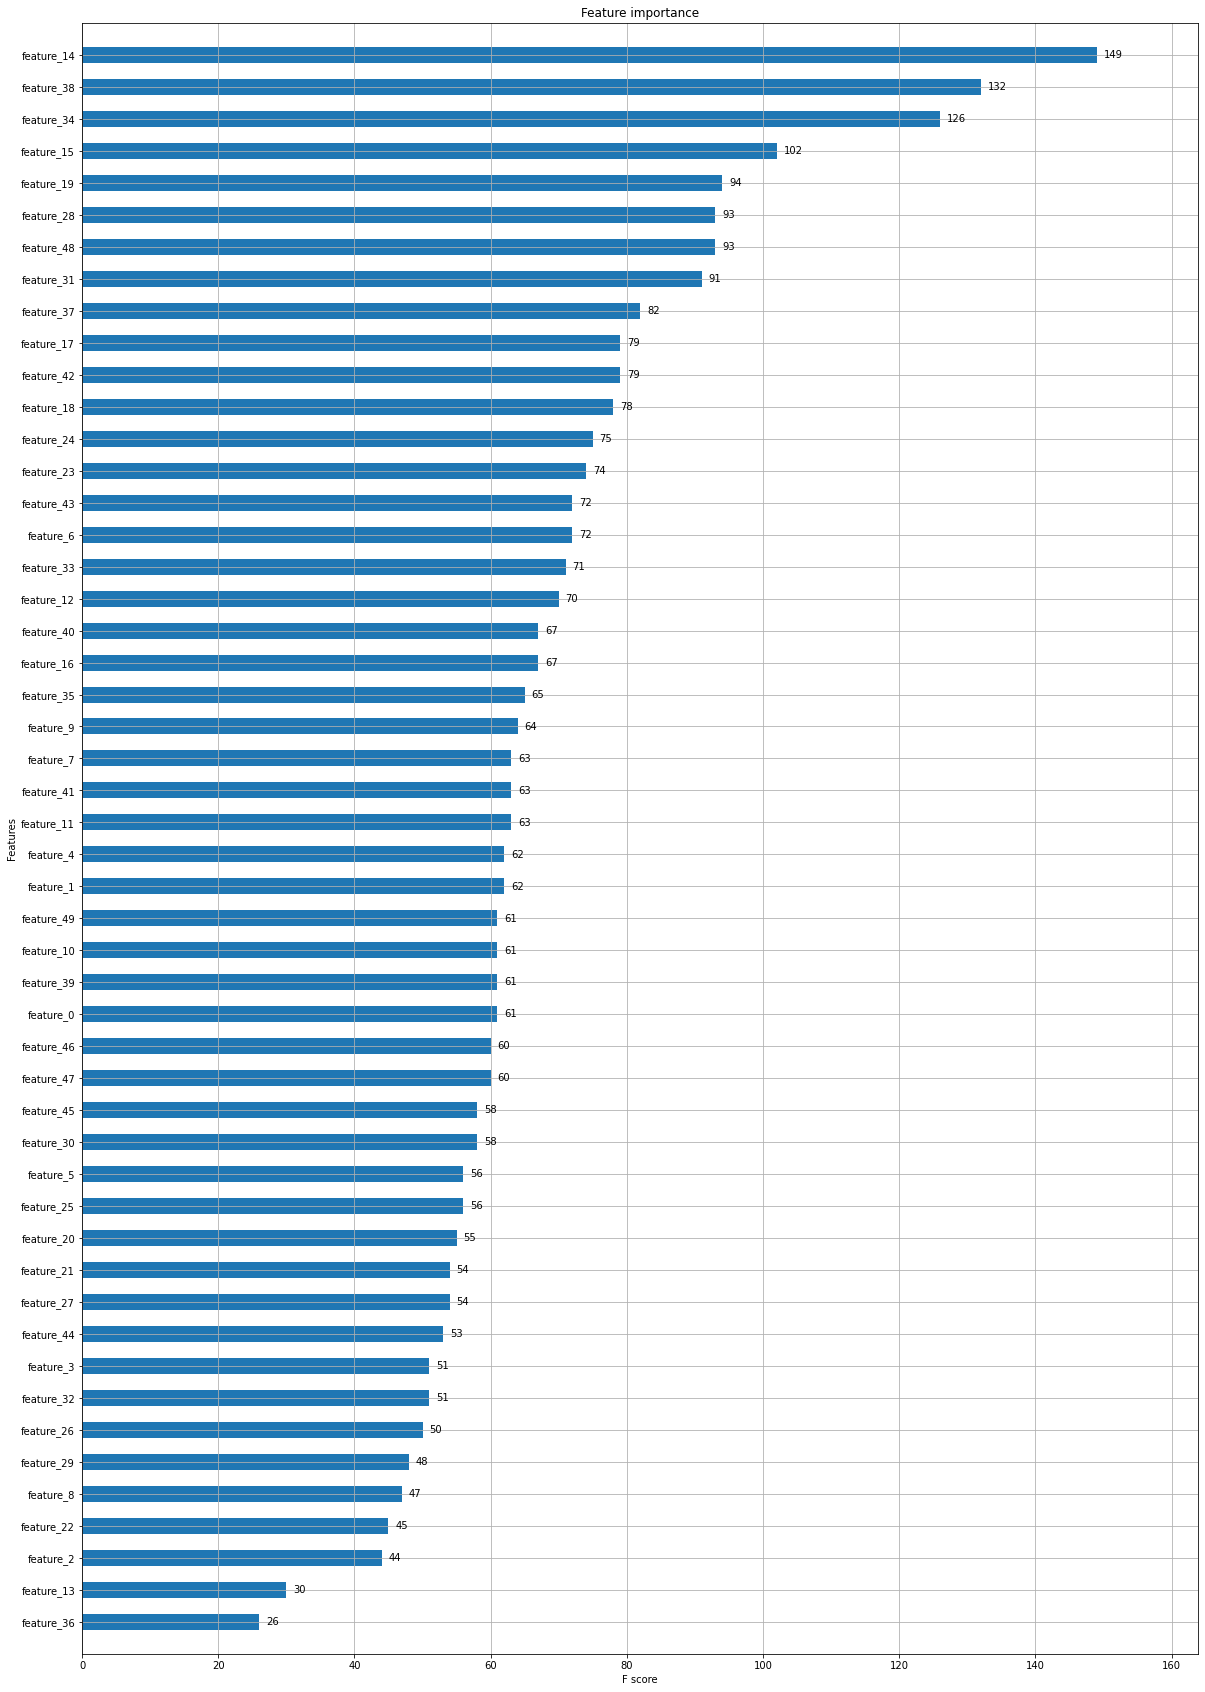

In [101]:
fig,ax=plt.subplots(figsize=(20,30))

plot_importance(model,
                height=0.5,
               max_num_features=None,
               ax=ax)

In [102]:
pred_xgb=model.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred_xgb,y_test)
print(accuracy)

0.5775


## LightGBM

In [57]:
from lightgbm import LGBMClassifier, plot_importance
LGB = LGBMClassifier(random_state=1, use_label_encoder=True,num_leaves=40,min_data_in_leaf=30)
LGB.fit(X_test, y_test)

LGBMClassifier(min_data_in_leaf=30, num_leaves=40, random_state=1,
               use_label_encoder=True)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

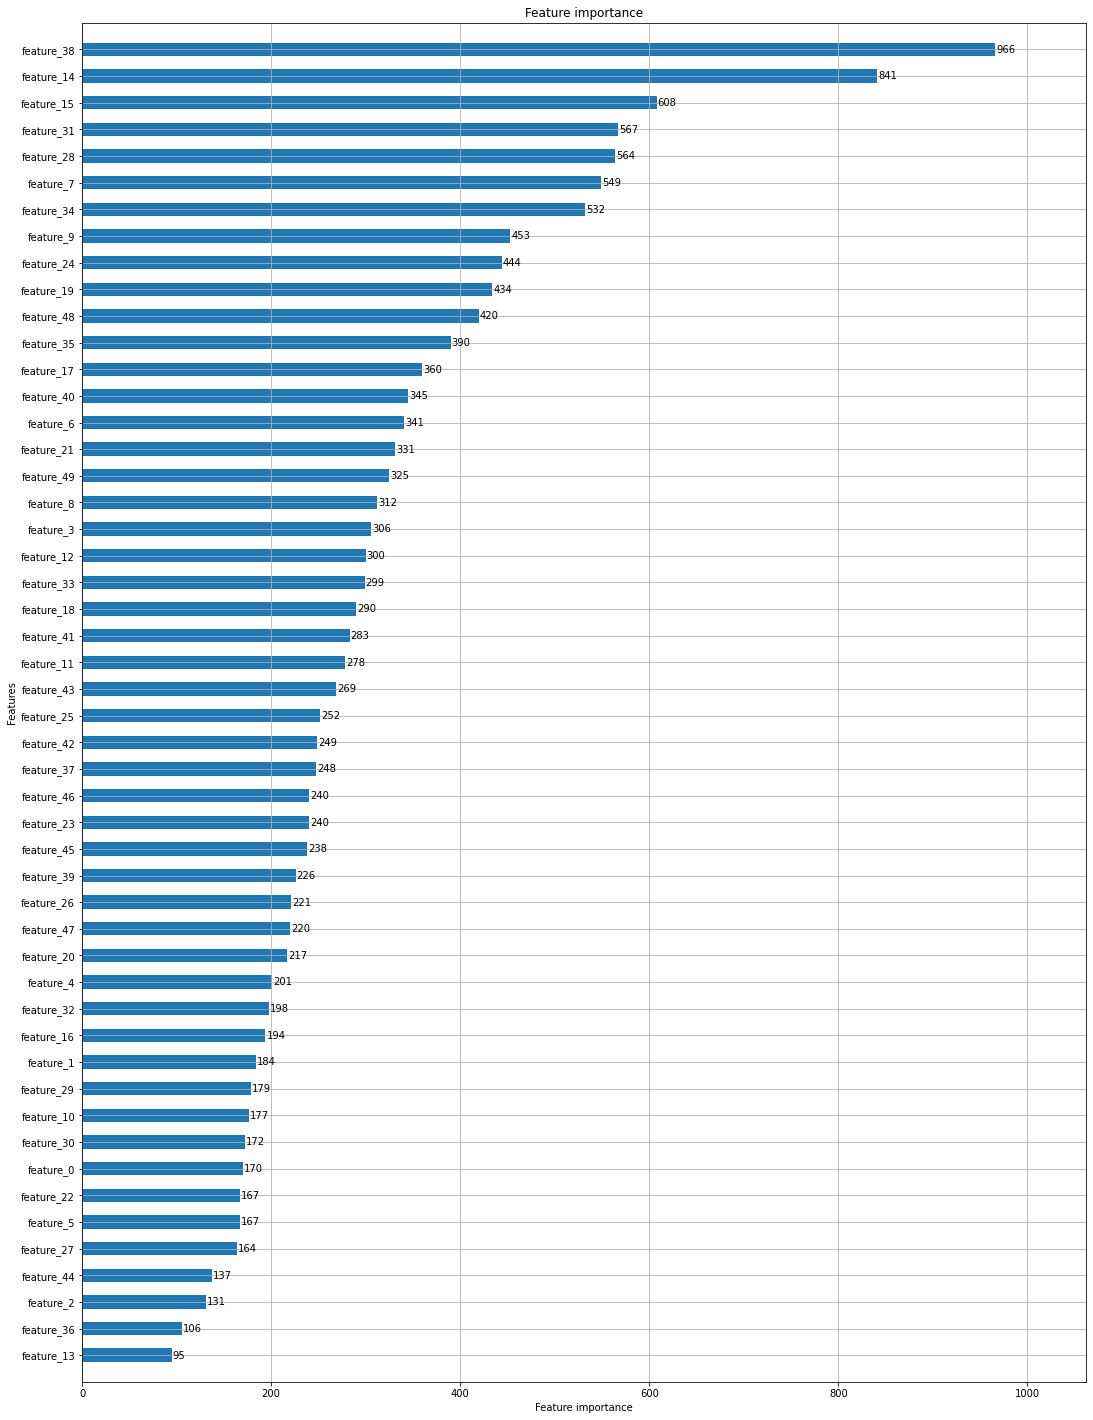

In [58]:
plot_importance(LGB._Booster,
                height=0.5,
               max_num_features=None,
                figsize=(18, 25))

In [59]:
pred_lgb=LGB.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(pred_lgb,y_test)
print(accuracy1)

0.64805


In [85]:
y1_pred=model.predict_proba(test)
print(y1_pred)


[[0.08489912 0.61795515 0.17340142 0.12374432]
 [0.07366775 0.645065   0.16668366 0.11458356]
 [0.0996459  0.60271186 0.19675988 0.10088239]
 ...
 [0.09351923 0.5091373  0.219615   0.17772849]
 [0.09331814 0.5718818  0.18682514 0.14797498]
 [0.08525427 0.57648546 0.18765311 0.15060714]]


In [86]:
y2_pred=LGB.predict_proba(test)
print(y2_pred)

[[0.07520183 0.56307738 0.28946979 0.07225099]
 [0.04977312 0.60788437 0.26142098 0.08092153]
 [0.05604898 0.63054993 0.14620649 0.1671946 ]
 ...
 [0.09784236 0.44846197 0.28173273 0.17196294]
 [0.06838017 0.69544842 0.14259665 0.09357477]
 [0.06116916 0.53324131 0.23894687 0.16664265]]


In [87]:
submission_xgb = pd.DataFrame(y1_pred,columns=['Class_1','Class_2','Class_3','Class_4'])
submission_xgb['id'] = submission['id']

In [88]:
submission_xgb  = submission_xgb[['id','Class_1','Class_2','Class_3','Class_4']]

In [89]:
submission_xgb

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.084899,0.617955,0.173401,0.123744
1,100001,0.073668,0.645065,0.166684,0.114584
2,100002,0.099646,0.602712,0.196760,0.100882
3,100003,0.090924,0.524381,0.263831,0.120864
4,100004,0.084197,0.589158,0.212499,0.114146
...,...,...,...,...,...
49995,149995,0.076227,0.691588,0.149836,0.082349
49996,149996,0.082377,0.638617,0.143660,0.135346
49997,149997,0.093519,0.509137,0.219615,0.177728
49998,149998,0.093318,0.571882,0.186825,0.147975


In [90]:
submission_xgb.to_csv('submission_xgb',index=False)

In [91]:
submission_xgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       50000 non-null  int64  
 1   Class_1  50000 non-null  float32
 2   Class_2  50000 non-null  float32
 3   Class_3  50000 non-null  float32
 4   Class_4  50000 non-null  float32
dtypes: float32(4), int64(1)
memory usage: 1.1 MB
